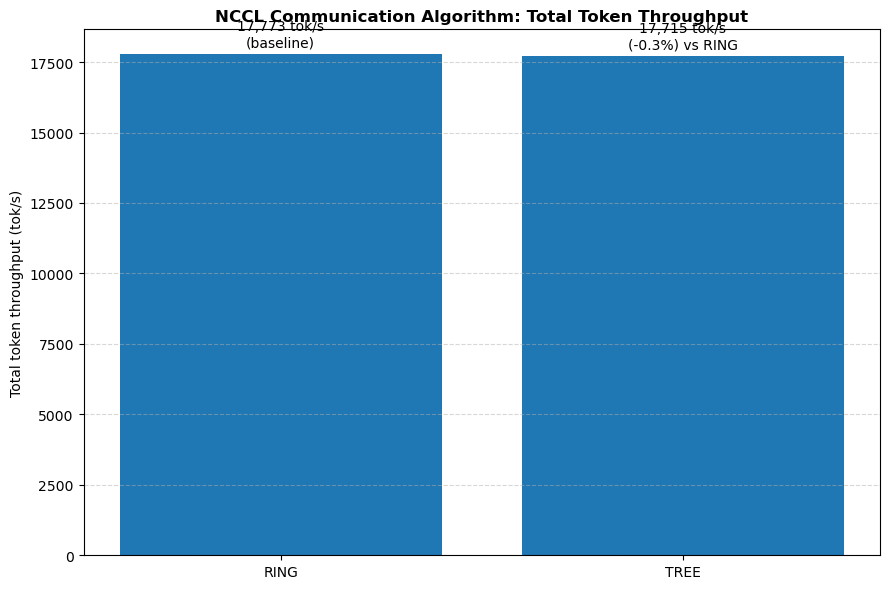

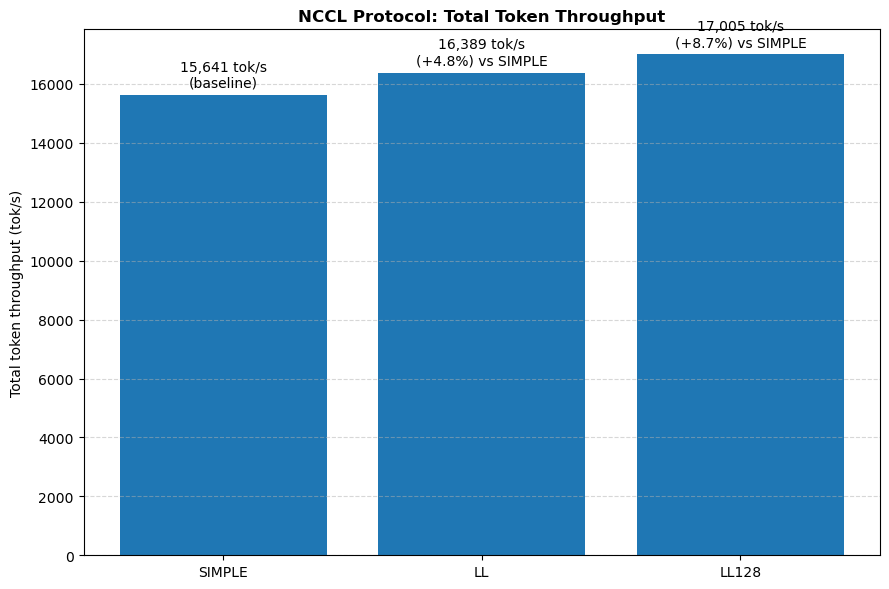

'Algorithm: RING=17,772.61 tok/s, TREE=17,714.98 tok/s (-0.3% vs RING)\nProtocol: SIMPLE=15,641.06 tok/s, LL=16,389.07 tok/s (+4.8% vs SIMPLE), LL128=17,005.06 tok/s (+8.7% vs SIMPLE)'

In [2]:
# Build summary tables and make two clean Matplotlib charts (no seaborn, one chart per figure)
import pandas as pd
import matplotlib.pyplot as plt
# from caas_jupyter_tools import display_dataframe_to_user

# ----------------------
# Raw results provided
# ----------------------
algo_data = [
    {"Variant": "RING", "Category": "Algorithm", "Total_tok_s": 17772.61},
    {"Variant": "TREE", "Category": "Algorithm", "Total_tok_s": 17714.98},
]

proto_data = [
    {"Variant": "SIMPLE", "Category": "Protocol", "Total_tok_s": 15641.06},
    {"Variant": "LL",     "Category": "Protocol", "Total_tok_s": 16389.07},
    {"Variant": "LL128",  "Category": "Protocol", "Total_tok_s": 17005.06},
]

df_algo  = pd.DataFrame(algo_data)
df_proto = pd.DataFrame(proto_data)

# ----------------------
# Compute deltas
# ----------------------
# For algorithms: show % change of TREE vs RING (treat RING as baseline)
base_algo = df_algo.loc[df_algo["Variant"] == "RING", "Total_tok_s"].values[0]
df_algo["Delta_vs_RING_%"] = (df_algo["Total_tok_s"] / base_algo - 1.0) * 100.0

# For protocols: show % change vs SIMPLE baseline
base_proto = df_proto.loc[df_proto["Variant"] == "SIMPLE", "Total_tok_s"].values[0]
df_proto["Delta_vs_SIMPLE_%"] = (df_proto["Total_tok_s"] / base_proto - 1.0) * 100.0

# Reorder for plotting
df_algo = df_algo.set_index("Variant").loc[["RING", "TREE"]].reset_index()
df_proto = df_proto.set_index("Variant").loc[["SIMPLE", "LL", "LL128"]].reset_index()

# Display the tables for reference
# display_dataframe_to_user("NCCL Algorithm Results (Total token throughput)", df_algo)
# display_dataframe_to_user("NCCL Protocol Results (Total token throughput)", df_proto)

# ----------------------
# Plot 1: Algorithm comparison (RING vs TREE)
# ----------------------
plt.figure(figsize=(9, 6))
x = range(len(df_algo))
vals = df_algo["Total_tok_s"].values

bars = plt.bar(x, vals)
plt.xticks(x, df_algo["Variant"].tolist())
plt.ylabel("Total token throughput (tok/s)")
plt.title("NCCL Communication Algorithm: Total Token Throughput", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate value and % vs RING on top of bars
for i, rect in enumerate(bars):
    height = rect.get_height()
    var = df_algo.loc[i, "Variant"]
    pct = df_algo.loc[i, "Delta_vs_RING_%"]
    label = f"{height:,.0f} tok/s"
    if var != "RING":
        label += f"\n({pct:+.1f}%) vs RING"
    else:
        label += "\n(baseline)"
    plt.text(rect.get_x() + rect.get_width()/2.0, height * 1.01, label,
             ha='center', va='bottom')

plt.tight_layout()
# plt.savefig("/mnt/data/nccl_algo_total_throughput.png", dpi=220, bbox_inches="tight")
# plt.savefig("/mnt/data/nccl_algo_total_throughput.pdf", bbox_inches="tight")
plt.show()

# ----------------------
# Plot 2: Protocol comparison (SIMPLE vs LL vs LL128)
# ----------------------
plt.figure(figsize=(9, 6))
x2 = range(len(df_proto))
vals2 = df_proto["Total_tok_s"].values

bars2 = plt.bar(x2, vals2)
plt.xticks(x2, df_proto["Variant"].tolist())
plt.ylabel("Total token throughput (tok/s)")
plt.title("NCCL Protocol: Total Token Throughput", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate value and % vs SIMPLE on top of bars
for i, rect in enumerate(bars2):
    height = rect.get_height()
    var = df_proto.loc[i, "Variant"]
    pct = df_proto.loc[i, "Delta_vs_SIMPLE_%"]
    label = f"{height:,.0f} tok/s"
    if var != "SIMPLE":
        label += f"\n({pct:+.1f}%) vs SIMPLE"
    else:
        label += "\n(baseline)"
    plt.text(rect.get_x() + rect.get_width()/2.0, height * 1.01, label,
             ha='center', va='bottom')

plt.tight_layout()
# plt.savefig("/mnt/data/nccl_protocol_total_throughput.png", dpi=220, bbox_inches="tight")
# plt.savefig("/mnt/data/nccl_protocol_total_throughput.pdf", bbox_inches="tight")
plt.show()

# Create a short markdown-style text summary as a string (not printed, but available if needed)
summary = (
    f"Algorithm: RING={base_algo:,.2f} tok/s, TREE={df_algo.loc[df_algo['Variant']=='TREE','Total_tok_s'].values[0]:,.2f} tok/s "
    f"({df_algo.loc[df_algo['Variant']=='TREE','Delta_vs_RING_%'].values[0]:+.1f}% vs RING)\n"
    f"Protocol: SIMPLE={base_proto:,.2f} tok/s, LL={df_proto.loc[df_proto['Variant']=='LL','Total_tok_s'].values[0]:,.2f} tok/s "
    f"({df_proto.loc[df_proto['Variant']=='LL','Delta_vs_SIMPLE_%'].values[0]:+.1f}% vs SIMPLE), "
    f"LL128={df_proto.loc[df_proto['Variant']=='LL128','Total_tok_s'].values[0]:,.2f} tok/s "
    f"({df_proto.loc[df_proto['Variant']=='LL128','Delta_vs_SIMPLE_%'].values[0]:+.1f}% vs SIMPLE)"
)

summary


/tmp/ipykernel_1395146/1492726669.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Variant", y="Total_tok_s", data=df_algo, palette=seg_colors, edgecolor='black')
/tmp/ipykernel_1395146/1492726669.py:55: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax1 = sns.barplot(x="Variant", y="Total_tok_s", data=df_algo, palette=seg_colors, edgecolor='black')


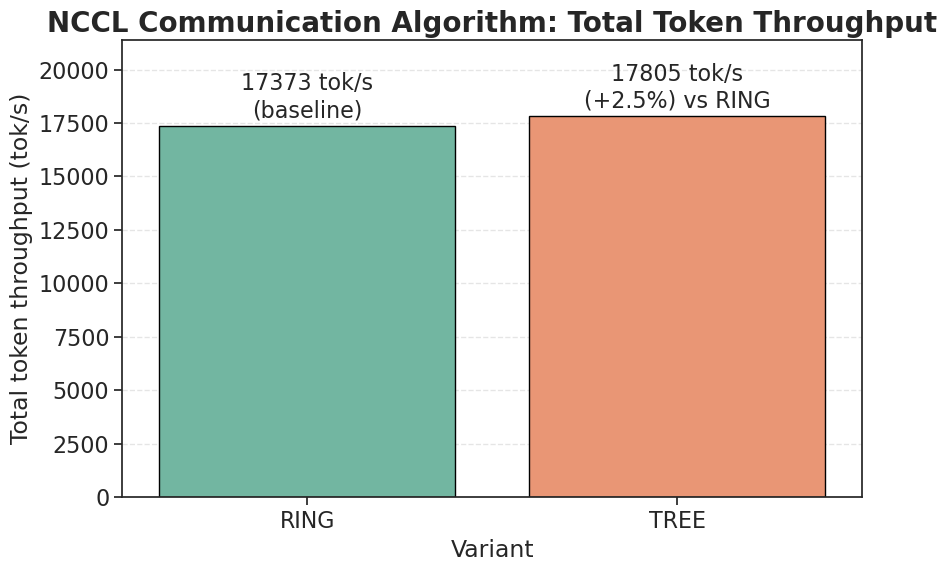

/tmp/ipykernel_1395146/1492726669.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x="Variant", y="Total_tok_s", data=df_proto, palette=seg_colors, edgecolor='black')


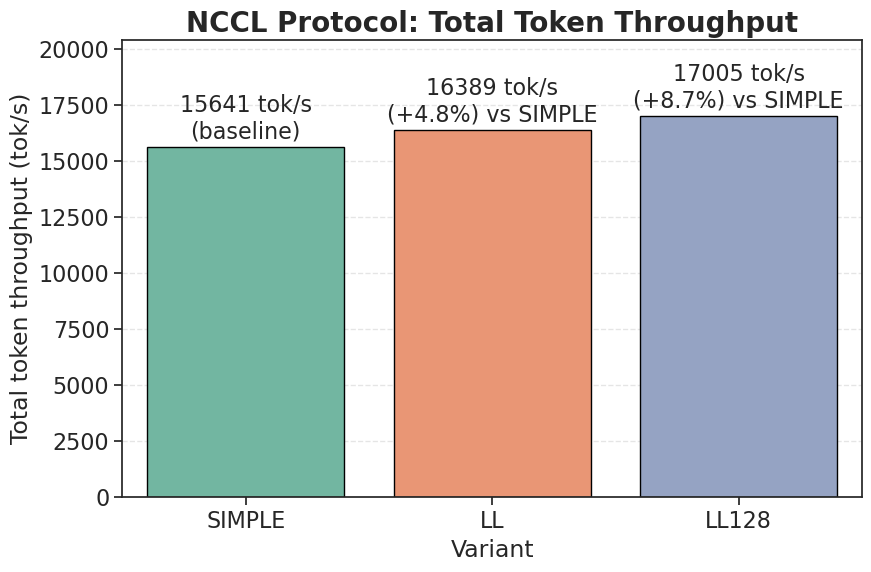

In [10]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =========================================================
# 全局样式（你指定的主题）
# =========================================================

palette = sns.color_palette('Set2')
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")
sns.set(style='white', palette='Set2', color_codes=False)
sns.set_style("ticks")
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

colors = sns.color_palette('Set2')
seg_colors = [colors[0], colors[1], colors[2]]
line_colors = [colors[3], colors[4], colors[5]]

# =========================================================
# 数据
# =========================================================
algo_data = [
    {"Variant": "RING", "Total_tok_s": 17372.61},
    {"Variant": "TREE", "Total_tok_s": 17805.00},
]
proto_data = [
    {"Variant": "SIMPLE", "Total_tok_s": 15641.06},
    {"Variant": "LL", "Total_tok_s": 16389.07},
    {"Variant": "LL128", "Total_tok_s": 17005.06},
]

df_algo = pd.DataFrame(algo_data)
df_proto = pd.DataFrame(proto_data)

# =========================================================
# 计算提升百分比
# =========================================================
base_algo = df_algo.loc[df_algo["Variant"] == "RING", "Total_tok_s"].values[0]
df_algo["Delta_%"] = (df_algo["Total_tok_s"] / base_algo - 1.0) * 100

base_proto = df_proto.loc[df_proto["Variant"] == "SIMPLE", "Total_tok_s"].values[0]
df_proto["Delta_%"] = (df_proto["Total_tok_s"] / base_proto - 1.0) * 100

# =========================================================
# Plot 1: NCCL Algorithm (RING vs TREE)
# =========================================================
plt.figure(figsize=(9, 6))
ax1 = sns.barplot(x="Variant", y="Total_tok_s", data=df_algo, palette=seg_colors, edgecolor='black')
plt.title("NCCL Communication Algorithm: Total Token Throughput", fontweight="bold")
plt.ylabel("Total token throughput (tok/s)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# y axis
plt.ylim(0, df_algo["Total_tok_s"].max() * 1.2)

for i, row in df_algo.iterrows():
    label = f"{row['Total_tok_s']:.0f} tok/s"
    if row["Variant"] != "RING":
        label += f"\n({row['Delta_%']:+.1f}%) vs RING"
    else:
        label += "\n(baseline)"
    ax1.text(i, row["Total_tok_s"] * 1.01, label, ha="center", va="bottom")

plt.tight_layout()
plt.savefig("nccl_algo_total_throughput.png", dpi=220, bbox_inches="tight")
plt.savefig("nccl_algo_total_throughput.pdf", bbox_inches="tight")
plt.show()

# =========================================================
# Plot 2: NCCL Protocol (SIMPLE / LL / LL128)
# =========================================================
plt.figure(figsize=(9, 6))
ax2 = sns.barplot(x="Variant", y="Total_tok_s", data=df_proto, palette=seg_colors, edgecolor='black')
plt.title("NCCL Protocol: Total Token Throughput", fontweight="bold")
plt.ylabel("Total token throughput (tok/s)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, row in df_proto.iterrows():
    label = f"{row['Total_tok_s']:.0f} tok/s"
    if row["Variant"] != "SIMPLE":
        label += f"\n({row['Delta_%']:+.1f}%) vs SIMPLE"
    else:
        label += "\n(baseline)"
    ax2.text(i, row["Total_tok_s"] * 1.01, label, ha="center", va="bottom")

plt.ylim(0, df_proto["Total_tok_s"].max() * 1.2)

plt.tight_layout()
plt.savefig("nccl_protocol_total_throughput.png", dpi=220, bbox_inches="tight")
plt.savefig("nccl_protocol_total_throughput.pdf", bbox_inches="tight")
plt.show()
